**TASK 3 - HOUSE PRICE PREDICTION**

**CASE:**To predict the prices of houses in Boston from given dataset, using varaious techniques.

In [1]:
#Importing the important libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
from sklearn import metrics

Framing the dataframe from the dataset

In [2]:
hp_dataset=sklearn.datasets.load_boston()

In [4]:
#Loading a dataset to a Pandas dataframe 
hp_df=pd.DataFrame(hp_dataset.data, columns=hp_dataset.feature_names)

Checking information regarding the dataframe

In [5]:
hp_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding the target column of dataset to the dataframe
hp_df["Price"]=hp_dataset.target


In [7]:
hp_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
hp_df.shape

(506, 14)

In [9]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Checking for null values in the dataframe

In [10]:
hp_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Since there is no null values in the dataframe , so we can move ahead 

Checking for the statistical information regarding data

In [11]:
hp_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Finding the relation between the features of the dataset using correlation function and mapping it via Heatmaps.

In [12]:
correlation=hp_df.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


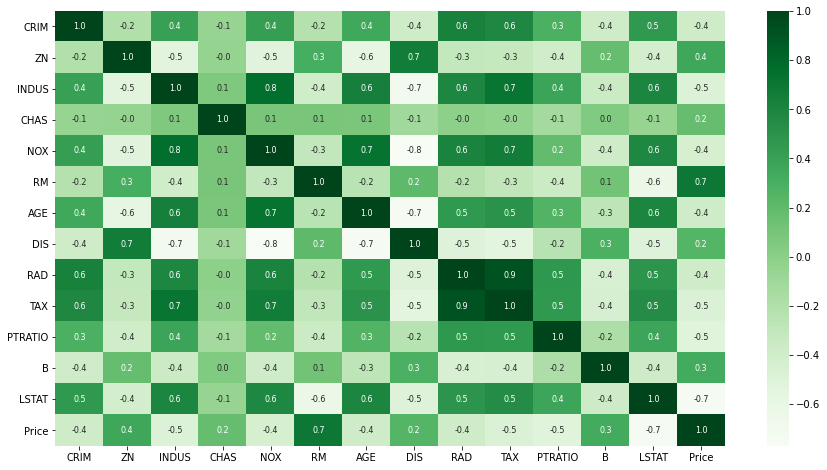

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation, cbar=True, annot_kws={'size':8}, annot=True, fmt='.1f', cmap='Greens')

**Analysis:** Lighter the color, more negative is the correlation. Example: LSTAT(Low status of living of people) vs Price(price of the house) is -0.7 means that as the LSTAT value increases, Price value decreases.

Dividing the dataset into Target(Price)  and independent variables

In [14]:
d= hp_df.drop(["Price"],axis=1)
t= hp_df["Price"]

In [15]:
print(d)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [16]:
print(t)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


**DATA VISUALIZATION**

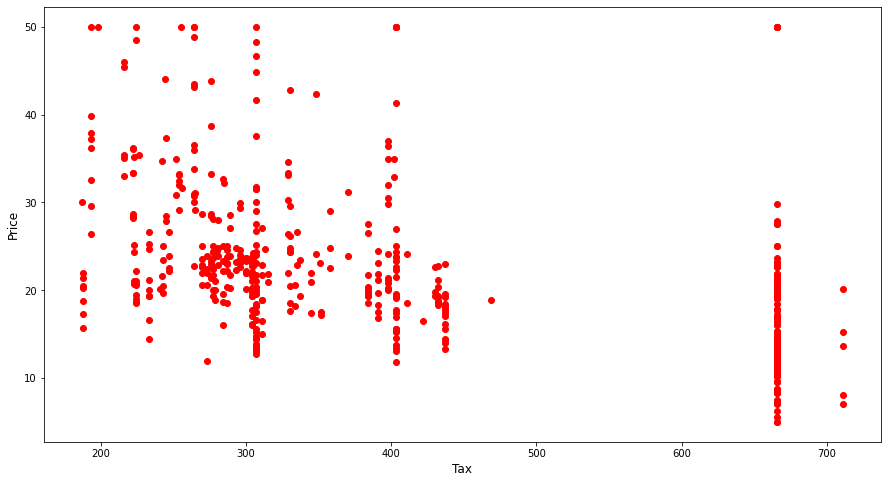

In [17]:
plt.figure(figsize=(15,8))

plt.scatter(d['TAX'],t,color='Red')
plt.ylabel('Price',fontsize=12)
plt.xlabel('Tax',fontsize=12)
plt.show()

**Analysis:** As it is evident from the scatter plot between "TAX" and "Price" that for the maximum increase in price TAX value lies less than 500USD. 


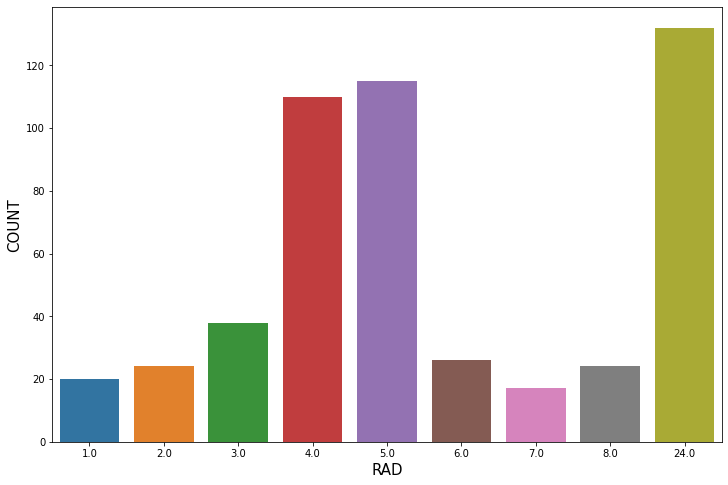

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='RAD',data=d)
plt.xlabel("RAD",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

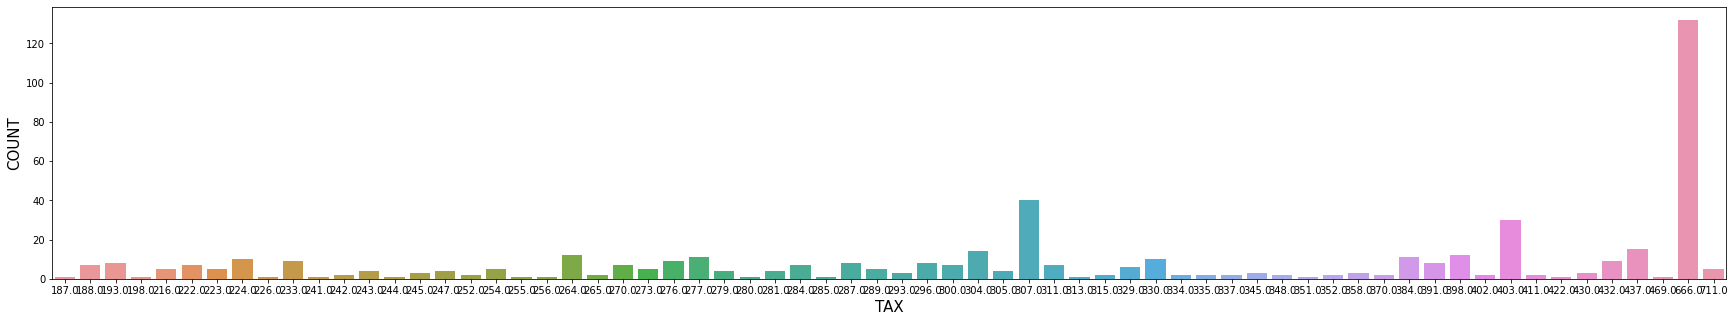

In [19]:
plt.figure(figsize=(30,5))
sns.countplot(x='TAX',data=d)
plt.xlabel("TAX",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

<Figure size 1080x576 with 0 Axes>

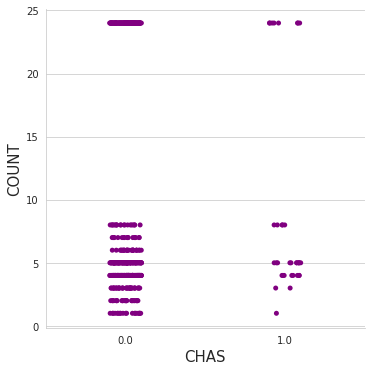

In [97]:
plt.figure(figsize=(15,8))
sns.catplot(x='CHAS',y='RAD',data=d, color='purple')
plt.xlabel("CHAS",fontsize=15)
plt.ylabel("RAD",fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


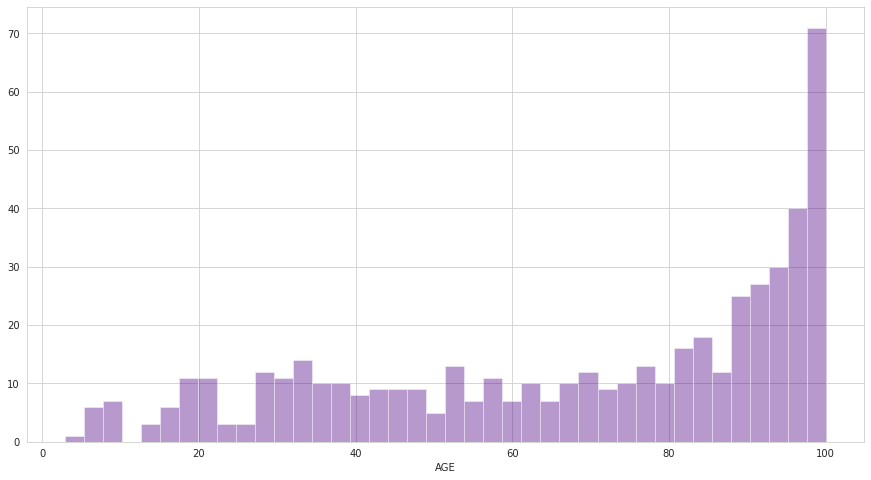

In [102]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.distplot(d['AGE'].dropna(),kde=False,color='indigo',bins=40)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


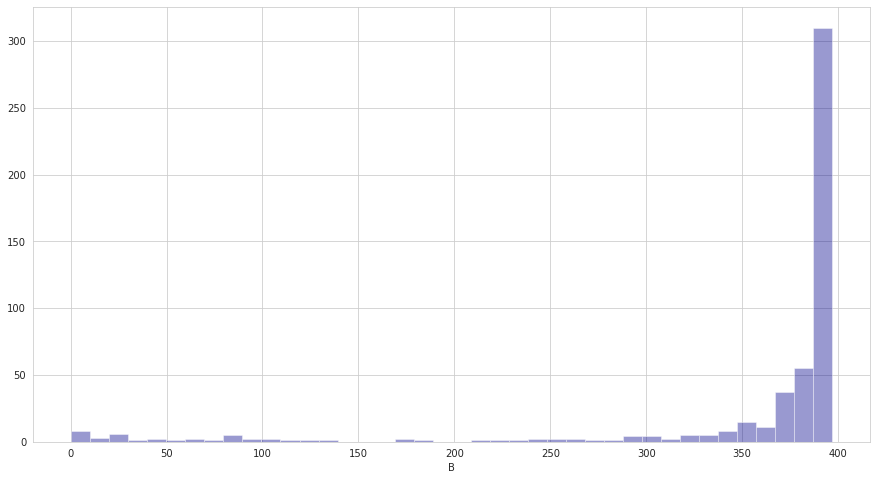

In [103]:
plt.figure(figsize=(15,8))
sns.distplot(d['B'].dropna(),kde=False,color='darkblue',bins=40)
plt.show()

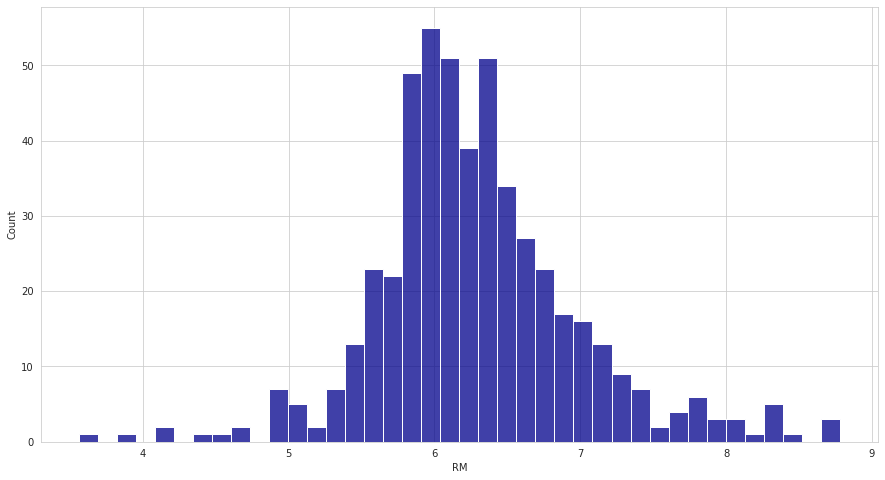

In [105]:
plt.figure(figsize=(15,8))
sns.histplot(d['RM'].dropna(),kde=False,color='darkblue',bins=40)
plt.show()

Selecting those features that strongly affect the target variable. these features contribute the most to the output feature. This process is known as Feature selection.

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
m=hp_df.iloc[:,0:13]
n=hp_df.iloc[:-1]

Converting the values in Target variable into int format in order to get the best features suitable for our prediction

In [ ]:
n = np.round(hp_df['Price'])

#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(m,n)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(m.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Respective_Columns','Score'] #naming the  new dataframe columns
featureScores

In [26]:
print(featureScores.nlargest(5,'Score'))

   Respective_Columns         Score
9                 TAX  14817.836927
1                  ZN   5937.859414
0                CRIM   5503.817133
11                  B   3340.486412
6                 AGE   2424.308937


So the columns of the Dataset that contribute most to out prediction are: TAX, ZN, CRIM, B and AGE. These are the columns with the maximum number of Scores obtained from feature selection process.

**Price prediction using the linear regression**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(d,t, test_size=0.2, random_state=2)

In [29]:
print(d.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_predict=model.predict(x_train)
y_predict

array([25.01156658, 23.20086342, 19.63206629, 30.79723661, 13.29598163,
       12.35655178, 21.17619058, 11.52105413, 13.48284934, 23.29619143,
       16.67181245, 11.9640623 , 32.53526883, 25.38737924, 29.80188665,
       19.51269487, 24.14966495, 24.10079632, 30.6933436 , 19.14366521,
       33.53309203,  3.93459665, 41.11203484, 24.48533152, 20.09948308,
       23.54618062, 21.50057915, 25.02443747, 22.39275602, 33.67942244,
       25.49286716,  8.07877994, 17.45164918, 10.02711469, 20.30483806,
       12.97802751, 18.36662544, 25.4320083 , 14.00655745, 17.89557148,
       24.77620977, 28.90131112, 17.27439484, 23.1865498 , 12.62489379,
       11.32274928, 27.4978866 , 19.49269776, 44.80229099, 16.9529603 ,
       22.44602306, 33.66680303, 20.2706101 , 20.70205114, 20.98558754,
       21.63228494, 27.05322369, 33.11940621, 25.61757987, 32.73314444,
       20.91920151, 41.11899411, 15.32086807,  8.42394611, 22.84480968,
       13.72210624, 28.60744627, 17.09291577, 26.76454185, 39.14

In [32]:
print("Accuracy over training data",model.score(x_train,y_train)*100)

Accuracy over training data 72.85831776605592


In [ ]:
print("Accuracy over test data",model.score(x_test,y_test)*100)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
print("Accuracy of the model",r2_score(n,model.predict(m))*100)

Accuracy of the model 73.80321233689475


In [38]:
print(mean_squared_error(y_train,y_predict))

22.953693576112883


The value is closer to 0 hence very less amount of error in our model. or we can also say that our model is very much perfect.

Now lets visualize our model 

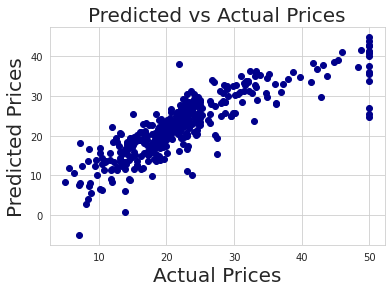

<Figure size 1440x1080 with 0 Axes>

In [39]:
plt.scatter(y_train,y_predict,color='darkblue')
plt.ylabel("Predicted Prices",fontsize=20)
plt.xlabel("Actual Prices", fontsize=20)
plt.title("Predicted vs Actual Prices", fontsize=20)
plt.figure(figsize=(20,15))
plt.show()

Checking for residuals. Residuals are defined as the difference between the observed or actual value of target variable and predicted value of target variable

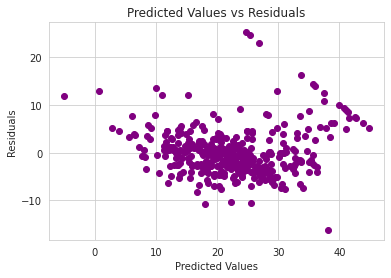

In [40]:
plt.scatter(y_predict,y_train-y_predict,color='purple')
plt.title("Predicted Values vs Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Plotting the histogram for count of Residuals 

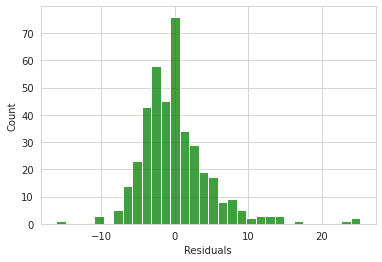

<Figure size 720x720 with 0 Axes>

In [41]:
sns.histplot(y_train-y_predict, color='green')
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.figure(figsize=(10,10))
plt.show()

Anlysis: Since for 0 residuals, plot is showing maximum value , that means difference between predicted and feature value is mostly 0. thia implies that our moddel is working fine and nearly perfect.


**Analysis after Linear Regression:**

Model Accuracy Score: 73.1% 

Training Accuracy: 72.9%

Testing Accuracy: 73.1% 
